# Data visualization project
## Ford GoBike analisys and visualization
<span style="color:lightslategray;font-size:12px;">By Andrés Pozuelo, May-2019</span>
## Index
- [What is Ford GoBike?](#whatis)
- [Gathering data and Create a dataset](#create)
- [Assessing Data](#asse)
- [Cleaning Data](#clean)
- [Answering the questions](#answer)
- [Univariate Exploration](#uni)
- [Bivariate Exploration](#bi)
- [Multivariate Exploration](#multi)

### What is Ford GoBike? <a id='whatis'></a>
Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

### Gathering data and Create a dataset<a id='create'></a>

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

import os
import glob

%matplotlib inline
from matplotlib.sankey import Sankey

In [2]:
all_files = glob.glob(os.path.join('csv\*.csv'))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)
#df.to_csv('gobike.csv', index=False)

#### Original structure
This first dataset has more than 2.7 million records in 16 columns and includes records from 2018-01-01 to 2019-09-30.

In [3]:
print(df['start_time'].min())
print(df['start_time'].max())
print(df.shape)
print(df.dtypes)

2018-01-01 00:01:53.8470
2019-04-30 23:59:04.7390
(2734625, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


### Assessing data<a id='asse'></a>

In [4]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
449208,227,2018-05-31 09:24:12.5300,2018-05-31 09:27:59.6760,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,27.0,Beale St at Harrison St,37.788059,-122.391865,3732,Subscriber,1962.0,Male,No
1024550,381,2018-08-30 22:56:19.6200,2018-08-30 23:02:41.4210,175.0,49th St at Telegraph Ave,37.835946,-122.262366,212.0,Mosswood Park,37.824931,-122.260479,585,Subscriber,1987.0,Male,No
2680711,262,2019-04-06 16:05:26.0000,2019-04-06 16:09:48.4140,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,349.0,Howard St at Mary St,37.781010,-122.405666,1423,Subscriber,1988.0,Female,No
1512706,594,2018-10-13 16:50:10.4870,2018-10-13 17:00:05.1090,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,31.0,Raymond Kimbell Playground,37.783813,-122.434559,4335,Subscriber,1984.0,Male,No
2543142,997,2019-04-23 17:38:44.7380,2019-04-23 17:55:22.6780,27.0,Beale St at Harrison St,37.788059,-122.391865,355.0,23rd St at Tennessee St,37.755367,-122.388795,1205,Subscriber,1991.0,Male,No
1138343,1369,2018-08-12 16:04:18.6970,2018-08-12 16:27:07.7150,50.0,2nd St at Townsend St,37.780526,-122.390288,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,1260,Customer,1992.0,Male,No
429963,104,2018-04-04 09:06:12.9360,2018-04-04 09:07:57.2890,243.0,Bancroft Way at College Ave,37.869360,-122.254337,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,1129,Subscriber,1994.0,Male,Yes
2213067,911,2019-02-05 23:18:50.5550,2019-02-05 23:34:02.1320,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,2737,Subscriber,1976.0,Female,Yes
2063793,928,2019-02-28 08:33:10.6560,2019-02-28 08:48:39.3700,78.0,Folsom St at 9th St,37.773717,-122.411647,11.0,Davis St at Jackson St,37.797280,-122.398436,4834,Subscriber,1989.0,Male,No
838021,726,2018-07-28 18:59:47.5710,2018-07-28 19:11:54.5150,100.0,Bryant St at 15th St,37.767100,-122.410662,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,2957,Subscriber,1989.0,Male,No


In [5]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 16 columns):
duration_sec               2734625 non-null int64
start_time                 2734625 non-null object
end_time                   2734625 non-null object
start_station_id           2722124 non-null float64
start_station_name         2722124 non-null object
start_station_latitude     2734625 non-null float64
start_station_longitude    2734625 non-null float64
end_station_id             2722124 non-null float64
end_station_name           2722124 non-null object
end_station_latitude       2734625 non-null float64
end_station_longitude      2734625 non-null float64
bike_id                    2734625 non-null int64
user_type                  2734625 non-null object
member_birth_year          2583000 non-null float64
member_gender              2583354 non-null object
bike_share_for_all_trip    2734625 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 333.8+ MB


In [6]:
# Check duplicates
df.duplicated().sum()

0

In [7]:
# It is not possible so elderly users
print(df['member_birth_year'].min())
print(df['member_birth_year'].max())

1878.0
2001.0


**Quality issues**
 * It is not possible so elderly users
 * The start_time and end_time fields must be of the timestamp type
 * The user_type, member_gender and bike_share_for_all_trip field can be of the category type
 * Añadir columnas de año, mes, día, semana y hora

### Cleaning Data<a id='clean'></a>

In [60]:
# Copy data
df_clean = df.copy()

#### Calculation of age and discarding users over 80 years

In [61]:
# create age field
df_clean['age'] = 2019-df_clean['member_birth_year']

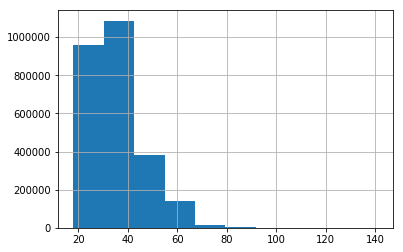

In [62]:
df_clean['age'].hist();

In [63]:
# Discarding users over 80 years and null values
df_clean = df_clean.query('age <= 80')

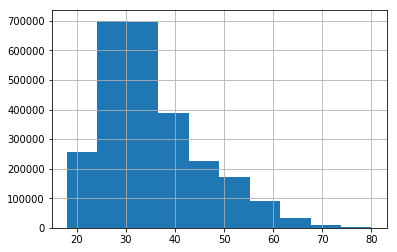

In [64]:
df_clean['age'].hist();

#### Change to timestamp type

In [65]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [66]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
age                               float64
dtype: object

#### Can be of the category type

In [71]:
df_clean.user_type = df_clean.user_type.astype('category')
# Desechamos Other gender
df_clean = df_clean.query('member_gender != "Other"')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [73]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
age                               float64
dtype: object

#### Add columns for year, month, week, day and hour

In [74]:
# Create columns
df_clean['year']=df_clean['start_time'].dt.year.astype(int)
df_clean['month']=df_clean['start_time'].dt.month.astype(int)
df_clean['week']=df_clean['start_time'].dt.strftime('%a')
df_clean['day']=df_clean['start_time'].dt.day.astype(int)
df_clean['hour']=df_clean['start_time'].dt.hour

In [75]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2536612 entries, 0 to 2734624
Data columns (total 22 columns):
duration_sec               2536612 non-null int64
start_time                 2536612 non-null datetime64[ns]
end_time                   2536612 non-null datetime64[ns]
start_station_id           2524538 non-null float64
start_station_name         2524538 non-null object
start_station_latitude     2536612 non-null float64
start_station_longitude    2536612 non-null float64
end_station_id             2524538 non-null float64
end_station_name           2524538 non-null object
end_station_latitude       2536612 non-null float64
end_station_longitude      2536612 non-null float64
bike_id                    2536612 non-null int64
user_type                  2536612 non-null category
member_birth_year          2536612 non-null float64
member_gender              2536612 non-null category
bike_share_for_all_trip    2536612 non-null category
age                        2536612 non-null 

#### Save the clean-master dataset

In [76]:
#df_clean.to_csv('clean_master_gobike.csv', index=False)

### What is the structure of your dataset?<a id='answer'></a>
The final structure has more than 2.5 million records in 21 columns where we can see:
- The times of the journeys
- From where and where with geolocation
- Age, gender and type of user
- The id of the bicycle and if it is shared for the all trip.

In addition columns of **year, week, month, day and hour** have been added for a better subsequent analysis

In [77]:
print(df_clean['start_time'].min())
print(df_clean['start_time'].max())
print(df_clean.shape)
print(df_clean.dtypes)

2018-01-01 00:07:41.040000
2019-04-30 23:59:04.739000
(2536612, 22)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
age                               float64
year                                int32
month                               int32
week                               object
day                                 int32
hour                                int64
dtype: o

### What is/are the main feature(s) of interest in your dataset?

- Initially I would like to see what is the general trend of monthly use, use by age and by gender in general terms
- Later I would like to check the same data with the year 2019 to see the trend.
- How many are the peak hours, the days of the week with the highest demand and if they affect the months with the lowest temperatures?
- And above all, see the flows of users going to and from where, time, and if they repeat the same flows back hours later.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- To support my research, the dataset has geolocation and time both start and end. This would be the most important for **see the behavior of the users regarding the trips.**

## Univariate Exploration<a id='uni'></a>
- First discovering the use of GoBike by age and gender.

In [78]:
grouped = df_clean.groupby('year')
grouped18 = grouped.get_group(2018)
grouped19 = grouped.get_group(2019)

# week days
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# base color
base_color = sb.color_palette()[0]

# variables start/end station for station analisys
startstation18 = grouped18.groupby('start_station_name')
startstation19 = grouped19.groupby('start_station_name')

endstation18 = grouped18.groupby('end_station_name')
endstation19 = grouped19.groupby('end_station_name')

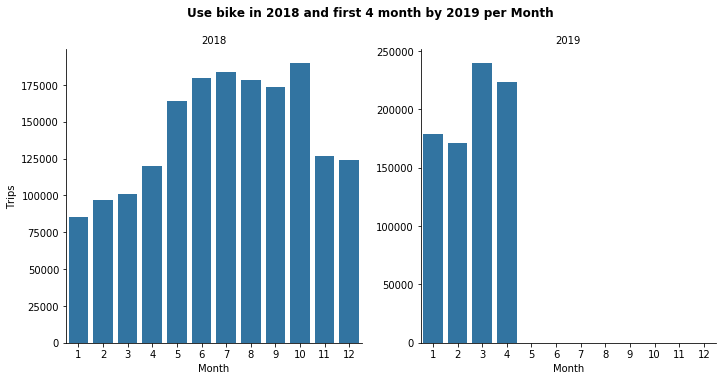

In [79]:
g = sb.catplot(data=df_clean, x='month', col="year", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Month", "Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Use bike in 2018 and first 4 month by 2019 per Month', y=1.05, fontsize=12, fontweight='semibold');

Indeed, the coldest and rainiest months there is less demand, being the months of May to October when users make more trips.
What is very significant is the large increase in demand compared to the first 4 months of every year. **We can talk about a 100% increase in demand**.
Later I will make a more detailed analysis.

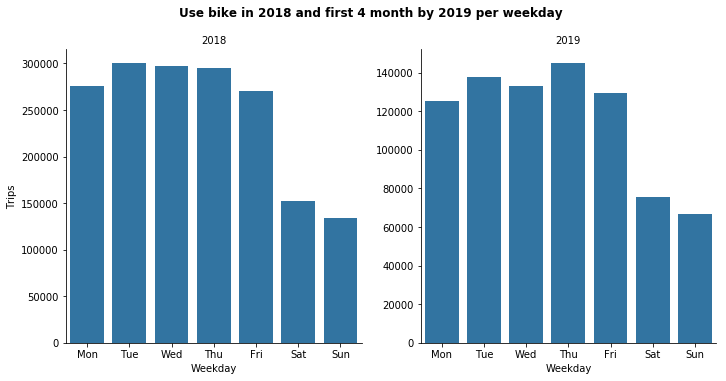

In [80]:
g = sb.catplot(data=df_clean, x='week', col="year", kind='count', sharey = False,
            color = base_color, order = weekday)
g.set_axis_labels("Weekday", "Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Use bike in 2018 and first 4 month by 2019 per weekday', y=1.05, fontsize=12, fontweight='semibold');

It can be seen that the usage trend per day of the week is the same in 2018 as in 2019

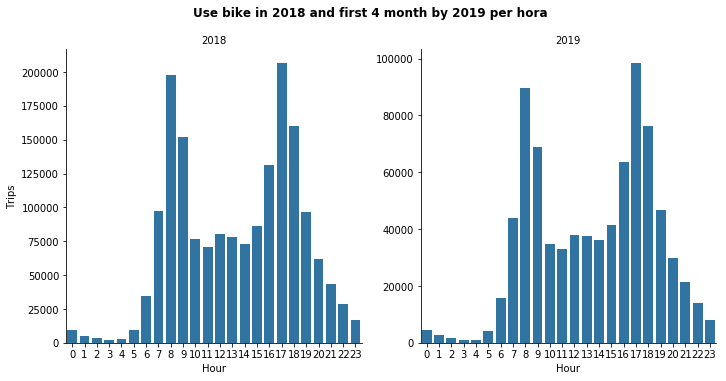

In [81]:
g = sb.catplot(data=df_clean, x='hour', col="year", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Hour", "Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Use bike in 2018 and first 4 month by 2019 per hora', y=1.05, fontsize=12, fontweight='semibold');

As happens with the days of the week, in the coming years.
Two peak hours are observed, 7 AM and 17 PM and a valley from 10 AM to 15 PM. Which leads me to think that users use a bicycle to go to and from work, and that they return from work more people on a bicycle than life. This can be true throughout life, using another type of transport. Upon returning, and with more time, it is nice to relax taking a walk.
**The latter is very interesting and try to expand it later.**

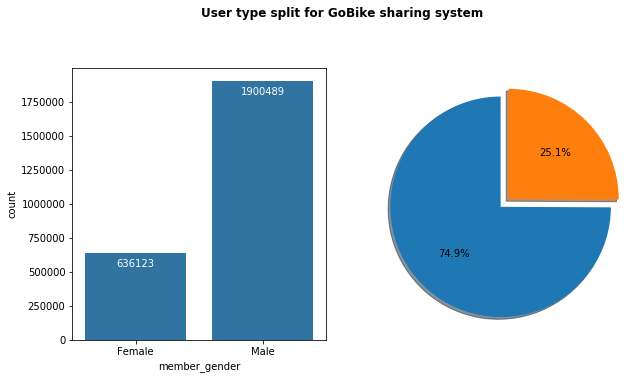

In [119]:
plt.figure(figsize = [10, 5])

# bar
plt.subplot(121)

sb.countplot(data = df_clean, x = 'member_gender', color = base_color)

# add annotations
n_points = df_clean.shape[0]
cat_counts = df_clean['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count-100000, pct_string, ha = 'center', color = 'w')

# age
plt.subplot(122)

labels = ['Male', 'Female']
sizes = [male_pie, female_pie]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.05, fontsize=12, fontweight='semibold');

In [158]:
flujos = df_clean.groupby(['hour','start_station_name','end_station_name'])['hour'].count()
flujos.head(8)

hour  start_station_name     end_station_name                         
0     10th Ave at E 15th St  10th Ave at E 15th St                        3
                             2nd Ave at E 18th St                         1
                             Frank H Ogawa Plaza                          1
      10th St at Empire St   10th St at Empire St                         1
      10th St at Fallon St   10th Ave at E 15th St                        3
                             24th St at Market St                         2
                             2nd Ave at E 18th St                         6
                             6th Ave at E 12th St (Temporary Location)    5
Name: hour, dtype: int64

Text(0.5,1,'The default settings produce a diagram like this.')

<Figure size 1080x720 with 0 Axes>

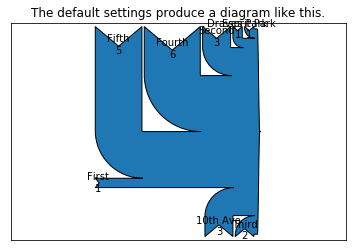

In [167]:
flujos = df_clean.groupby(['start_station_name','hour'])['start_time'].count() 

fig = plt.figure(figsize = [15, 10])



Sankey(flows=[3, 1, 1, 1, 3, 2, 6, 5],
       labels=['10th Ave', 'Esprit Park', 'Draves Park', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 1, 0, 1, -1, 1, 1]).finish()
plt.title("The default settings produce a diagram like this.")

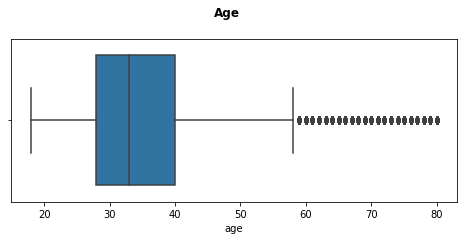

In [149]:
plt.figure(figsize = [8, 3])
sb.boxplot(data=df_clean, x='age', color=base_color);

plt.suptitle('Age', y=1.03, fontsize=12, fontweight='semibold');

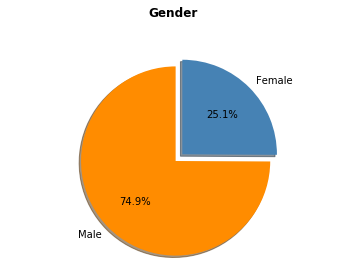

In [150]:
# calculating male and female
male = df_clean.query('member_gender == "Male"')['bike_id'].count()
female = df_clean.query('member_gender == "Female"')['bike_id'].count()

labels = ['Male', 'Female']
sizes = [male, female]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('Gender', y=1.03, fontsize=12, fontweight='semibold');

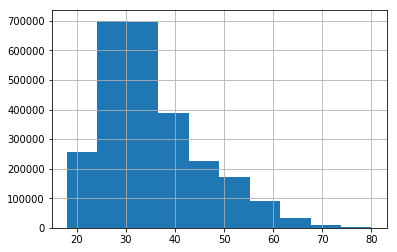

In [151]:
df_clean['age'].hist();

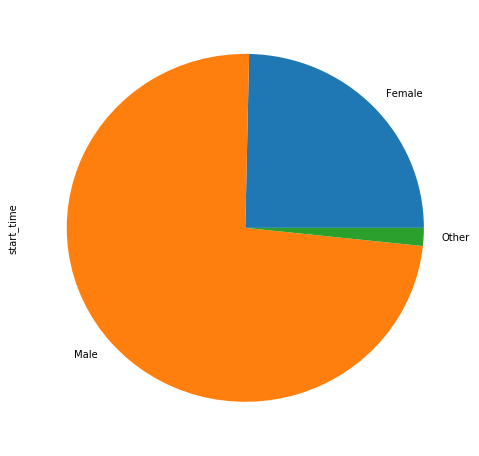

In [152]:
gpie = df_clean.groupby(['member_gender']).count()
gpie = gpie.start_time
gpie.plot(kind='pie', subplots=True, figsize=(8, 8));

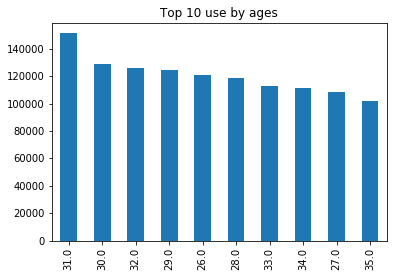

In [153]:
age10=df_clean['age'].value_counts()
age10=age10.head(10)
#fig = plt.figure(figsize=(30,20))
age10.plot(kind='bar', color = sb.color_palette()[0])
plt.title('Top 10 use by ages')
plt.show();

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration<a id='bi'></a>

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration<a id='multi'></a>

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!